# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple multivariate regression analyses using `statsmodels`;
- Use propensity score matching to estimate treatment effects;

---

## Important Dates

- Homework release: Fri 15 Nov 2024
- **Homework due**: Fri 29 Nov 2024, 23:59
- Grade release: Mon 09 Dec 2024

---

##  Some rules

1. You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.
2. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
3. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
4. In continuation to the previous point on additional library, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:

Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
Some of the TAs on this course literally published many works on detecting machine-generated text.

Here LLM includes but not limited to chatbots like ChatGPT, coding assistants like Copilot. Do not even use them to prettify your code or correct English. If you are caught using LLMs, you will be reported to the instructor and subject to the consequences. 


---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing ( 20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: Propensity Score Matching (10 points)

## Context

Within EPFL's master program, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in Switzerland !

Your mentor at the company Tim, has explained to you that the company is interested in a pricing model for used cars. 

- Tim: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Tim: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla-clean.csv` and `Task1-2.ToyotaCorolla-raw.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3
- `Task4.ToyotaCorolla_discount_sales` for Part 4

You should not use any other data source for this homework.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [899]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn
import csv

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)


**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [900]:
# Fonction pour gérer les lignes problématiques
def handle_bad_line(line):
    """
    Réassemble les champs pour les lignes mal formatées.
    """
    # Rejoindre les champs avec des virgules pour reconstruire la ligne
    # ou appliquer une logique spécifique pour corriger
    return [line[0] + line[1]] + line[2:]  # Merge the first two elements without a comma and keep the rest as is

# Lire le fichier CSV en appelant la fonction pour gérer les lignes problématiques
df_raw = pd.read_csv(
    "data/Task1-2.ToyotaCorolla-raw.csv",
    delimiter=",",  # Séparateur
    on_bad_lines=handle_bad_line,  # Fonction pour traiter les mauvaises lignes
    engine="python"  
)

In [901]:
df_raw.head(5)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23.0,46986.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,EURO
1,11878.0,23.0,72937.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
2,12050.0,24.0,41711.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
3,12914.0,26.0,48000.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1165.0,CHF
4,11878.0,30.0,38500.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1170.0,CHF


**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [902]:
# Check for NaN values in the DataFrame
nan_counts = df_raw.isna().sum()
print(nan_counts)
# Sum over all rows
nan_sum = df_raw.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {nan_sum}")

# Find the rows with NaN values
nan_rows = df_raw[df_raw.isna().any(axis=1)]
print(f"Index of the row with NaN values: {nan_rows.index.tolist()}")
print(nan_rows)

Price        0
Age          1
Mileage      1
FuelType     1
HP           1
MetColor     1
Automatic    1
CC           1
Doors        1
Weight       1
Currency     1
dtype: int64
Total NaN values in the DataFrame: 10
Index of the row with NaN values: [906]
                                                Price  Age Mileage FuelType  \
906  8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF  NaN    None     None   

     HP  MetColor  Automatic  CC  Doors  Weight Currency  
906 NaN       NaN        NaN NaN    NaN     NaN     None  


In [903]:
# Fix the problematic row by replacing ';' with ',' and splitting the values
fixed_row = nan_rows.iloc[0, 0].replace(';', ',').split(',')

# Update the DataFrame with the fixed row
df_raw.iloc[906] = fixed_row

# Verify the fix
df_raw.iloc[906]

C:\Users\thier\AppData\Local\Temp\ipykernel_12692\2973743970.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '68' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.iloc[906] = fixed_row
C:\Users\thier\AppData\Local\Temp\ipykernel_12692\2973743970.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '110' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.iloc[906] = fixed_row
C:\Users\thier\AppData\Local\Temp\ipykernel_12692\2973743970.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_raw.iloc[906] = fixed_row
C:\Users\thier\AppData\Local\Temp\ipyker

Price         8423.0
Age               68
Mileage      58860.0
FuelType      Petrol
HP               110
MetColor           1
Automatic          0
CC              1600
Doors              3
Weight          1055
Currency         CHF
Name: 906, dtype: object

**1.3 (4 pts): Compute the mean, median of the `Price` column.**

1. Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.
2. After computing the mean and median, do you think they are reasonable? If not, what could be the reason for this? 
  
Hint: Is all values in the `Price` column numerical?


In [904]:
df_raw['Price'] = df_raw['Price'].str.replace(',', '')
df_raw['Price'] = df_raw['Price'].str.replace('£', '')
df_raw['Price'] = df_raw['Price'].astype(float)

medianPrice = df_raw['Price'].median()
meanPrice = df_raw['Price'].mean()

print("Median Price: ", medianPrice)
print("Mean Price: ", meanPrice)

Median Price:  8595.0
Mean Price:  10715727218892.951


In [905]:
## Print the problematic row
#print(df_raw.iloc[34])
#
## Handle problematic rows by splitting the values and taking the first element
prices = df_raw["Price"]
#
## Remove unwanted characters and convert the 'Price' column to numeric
#prices = prices.str.replace(",", "").str.replace("£", "").str.replace("CHF", "")
#prices = pd.to_numeric(prices)
#
## Calculate the IQR for the 'Price' column
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify the massive outliers
massive_outliers = prices[prices > upper_bound + 1.5 * IQR]
print(massive_outliers.sort_values(ascending=False))

# We identify the massive outliers and update the prices
#prices[34] /= 1e12

34     1.539850e+16
109    2.807400e+04
111    2.701600e+04
110    2.677900e+04
179    2.250000e+04
116    2.195000e+04
115    2.158800e+04
113    2.155200e+04
112    2.155200e+04
147    2.116400e+04
141    2.068900e+04
171    2.051600e+04
168    2.050000e+04
138    1.986900e+04
114    1.982500e+04
175    1.981795e+04
16     1.965200e+04
148    1.945000e+04
14     1.943600e+04
Name: Price, dtype: float64


In [906]:
# Compute the mean and median of the 'prices' column
mean_price = prices.mean()
median_price = prices.median()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")

Mean Price: 10715727218892.951
Median Price: 8595.0


**1.4 (4 pts): Convert Units**

From now on, we will work with the cleaned data `Task1-2.ToyotaCorolla-clean.csv`. Read it into a DataFrame.

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to CHF and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 CHF
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in EUR or GBP to CHF, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [907]:
df_clean = pd.read_csv("data/Task1-2.ToyotaCorolla-clean.csv")

def convert_price(row):
    if row['Currency'] == 'EURO':
        return row['Price'] / 1.05
    elif row['Currency'] == 'GBP':
        return row['Price'] * 1.15
    else:
        return row['Price']
    

df_clean['Price'] = df_clean.apply(convert_price, axis=1)
df_clean['Price'] = round(df_clean['Price'])

price_stats = {
    'min': df_clean['Price'].min(),
    'mean': df_clean['Price'].mean(),
    'median': df_clean['Price'].median(),
    'max': df_clean['Price'].max()
}

print(price_stats)
print(df_clean.drop("Currency", axis=1))

{'min': 3758.0, 'mean': 9423.536211699164, 'median': 8595.0, 'max': 28074.0}
        Price  Age  Mileage FuelType   HP  MetColor  Automatic    CC  Doors  \
0     12857.0   23  46986.0   Diesel   90         1          0  2000      3   
1     11878.0   23  72937.0   Diesel   90         1          0  2000      3   
2     12050.0   24  41711.0   Diesel   90         1          0  2000      3   
3     12914.0   26  48000.0   Diesel   90         0          0  2000      3   
4     11878.0   30  38500.0   Diesel   90         0          0  2000      3   
...       ...  ...      ...      ...  ...       ...        ...   ...    ...   
1431   6479.0   69  20544.0   Petrol   86         1          0  1300      3   
1432   9369.0   72  19000.0   Petrol   86         0          0  1300      3   
1433   7343.0   71  17016.0   Petrol   86         0          0  1300      3   
1434   6263.0   70  16916.0   Petrol   86         1          0  1300      3   
1435   6004.0   76      1.0   Petrol  110         0   

In [908]:
df_clean = pd.read_csv("data/Task1-2.ToyotaCorolla-clean.csv")

# Convert prices to CHF
def convert_price(row):
    if row['Currency'] == 'EURO':
        return round(row['Price'] / 1.05)
    elif row['Currency'] == 'GBP':
        return round(row['Price'] * 1.15)
    else:
        return round(row['Price'])

df_clean['Price'] = df_clean.apply(convert_price, axis=1)

# Convert distances to kilometers for GBP cars
def convert_distance(row):
    if row['Currency'] == 'GBP':
        return round(row['Mileage'] * 1.61)
    else:
        return round(row['Mileage'])

df_clean['Mileage'] = df_clean.apply(convert_distance, axis=1)

# Drop the 'Currency' column
df_clean = df_clean.drop(columns=['Currency'])

# Calculate the min, mean, median, and max of the 'Price' and 'Mileage' columns
price_stats = {
    'min': df_clean['Price'].min(),
    'mean': df_clean['Price'].mean(),
    'median': df_clean['Price'].median(),
    'max': df_clean['Price'].max()
}

mileage_stats = {
    'min': df_clean['Mileage'].min(),
    'mean': df_clean['Mileage'].mean(),
    'median': df_clean['Mileage'].median(),
    'max': df_clean['Mileage'].max()
}

print("Price statistics:", price_stats)
print("Mileage statistics:", mileage_stats)

Price statistics: {'min': 3758, 'mean': 9423.536211699164, 'median': 8595.0, 'max': 28074}
Mileage statistics: {'min': 1, 'mean': 68533.25974930362, 'median': 63389.5, 'max': 243000}


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [909]:
#A

# Calculate the average price for each fuel type
average_price_per_fuel_type = df_clean.groupby('FuelType')['Price'].mean()
print(average_price_per_fuel_type)

# Determine which fuel type has the highest average price
highest_avg_price_fuel_type = average_price_per_fuel_type.idxmax()
print(f"The fuel type with the highest average price is: {highest_avg_price_fuel_type}")

FuelType
CNG       8383.235294
Diesel    9878.619355
Petrol    9381.722310
Name: Price, dtype: float64
The fuel type with the highest average price is: Diesel


In [910]:
#B
df_clean

# Calculate the average price for each nb of doors
average_price_per_nb_doors = df_clean.groupby('Doors')['Price'].mean()
print(average_price_per_nb_doors)

# Determine which fuel type has the highest average price
highest_avg_price_nb_doors = average_price_per_nb_doors.idxmax()
print(f"The car with the number of doors with the highest average price is: {highest_avg_price_nb_doors}")

Doors
2     6997.500000
3     8898.673633
4     8604.384058
5    10082.823442
Name: Price, dtype: float64
The car with the number of doors with the highest average price is: 5


**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

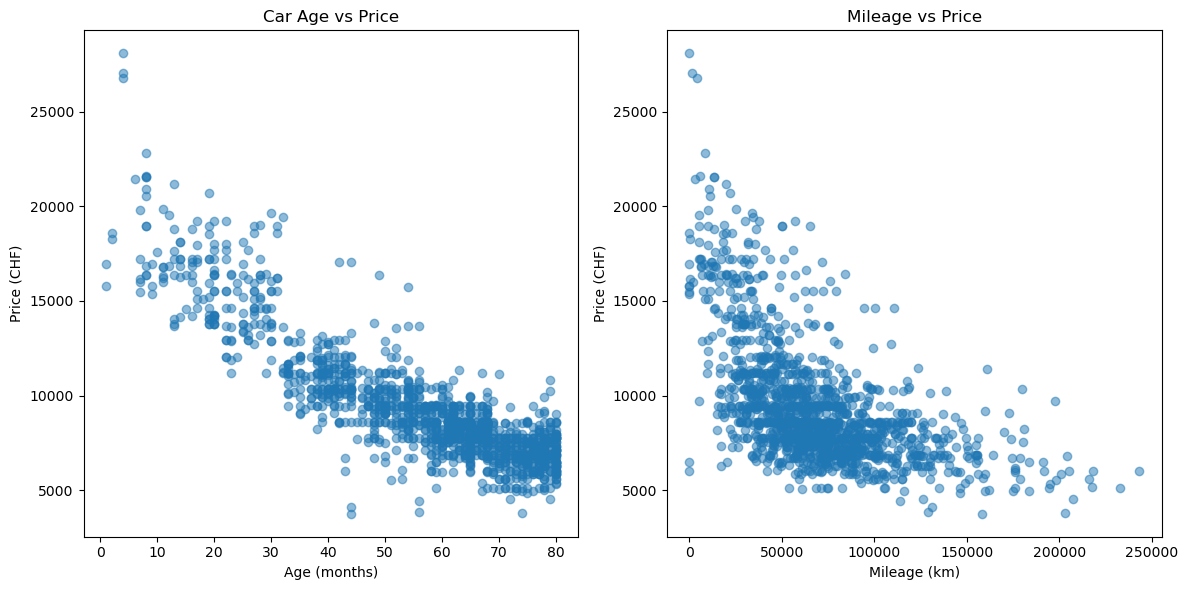

In [911]:
# Scatter plot for Car Age vs Price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_clean['Age'], df_clean['Price'], alpha=0.5)
plt.title('Car Age vs Price')
plt.xlabel('Age (months)')
plt.ylabel('Price (CHF)')

# Scatter plot for Mileage vs Price
plt.subplot(1, 2, 2)
plt.scatter(df_clean['Mileage'], df_clean['Price'], alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (CHF)')

plt.tight_layout()
plt.show()

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [912]:
pearson_corr = df_clean['Price'].corr(df_clean['Mileage'], method='pearson')
spearman_corr = df_clean['Price'].corr(df_clean['Mileage'], method='spearman')

print(f"Pearson correlation: {pearson_corr}")
print(f"Spearman correlation: {spearman_corr}")

Pearson correlation: -0.5634156654606516
Spearman correlation: -0.6053559019304244



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

Spearman is higher which match our previous miaw miaw muaw

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building machine learning models, how to asses performance is crucial. Hence we first implement some helper functions to asses the performance of our model. We can use these later throughout the exercise.

Implement the `accuracy` , `precision`, `recall` and `f1_score` functions with the following requirements:

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

Compare the results with the implementation in `sklearn` and see if they match.

In [913]:
def accuracy(true_labels, predicted_labels):
    """
    Calculate the accuracy of the model.
    Parameters
    ----------
    true_labels : np.array
        The true labels.
    predicted_labels : np.array
        The predicted labels.
    Returns
    -------
    float
        The accuracy of the model.
    """
    return np.mean(true_labels == predicted_labels)

def precision(true_labels, predicted_labels):
    """
    Calculate the precision of the model.
    Parameters
    ----------
    true_labels : np.array
        The true labels.
    predicted_labels : np.array
        The predicted labels.
    Returns
    -------
    float
        The precision of the model.
    """
    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    false_positives = np.sum((true_labels == 0) & (predicted_labels == 1))
    return true_positives / (true_positives + false_positives)

def recall(true_labels, predicted_labels):
    """
    Calculate the recall of the model.
    Parameters
    ----------
    true_labels : np.array
        The true labels.
    predicted_labels : np.array
        The predicted labels.
    Returns
    -------
    float
        The recall of the model.
    """
    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    false_negatives = np.sum((true_labels == 1) & (predicted_labels == 0))
    return true_positives / (true_positives + false_negatives)

def f1_score(true_labels, predicted_labels):
    """
    Calculate the F1 score of the model.
    Parameters
    ----------
    true_labels : np.array
        The true labels.
    predicted_labels : np.array
        The predicted labels.
    Returns
    -------
    float
        The F1 score of the model.
    """
    prec = precision(true_labels, predicted_labels)
    rec = recall(true_labels, predicted_labels)
    return (2 * prec * rec) / (prec + rec)

In [914]:
from sklearn import metrics

#Testing the functions
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])


assert round(accuracy(true_labels, predicted_labels), 2) == round(metrics.accuracy_score(true_labels, predicted_labels), 2)
assert round(precision(true_labels, predicted_labels), 2) == round(metrics.precision_score(true_labels, predicted_labels), 2)
assert round(recall(true_labels, predicted_labels), 2) == round(metrics.recall_score(true_labels, predicted_labels), 2)
assert round(f1_score(true_labels, predicted_labels), 2) == round(metrics.f1_score(true_labels, predicted_labels), 2)



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [915]:
# Convert categorical variables to one-hot encoding
df_clean_encoded = pd.get_dummies(df_clean, drop_first=True)
# Convert the 'Doors' column to one-hot encoding
df_clean_encoded = pd.get_dummies(df_clean_encoded, columns=['Doors'], drop_first=True)

# Print the number of columns after one-hot encoding
print(f"Number of columns before one-hot encoding: {df_clean.shape[1]}")
print(f"Number of columns after one-hot encoding: {df_clean_encoded.shape[1]}")
print(df_clean_encoded.columns)
print(df_clean.columns)

Number of columns before one-hot encoding: 10
Number of columns after one-hot encoding: 13
Index(['Price', 'Age', 'Mileage', 'HP', 'MetColor', 'Automatic', 'CC',
       'Weight', 'FuelType_Diesel', 'FuelType_Petrol', 'Doors_3', 'Doors_4',
       'Doors_5'],
      dtype='object')
Index(['Price', 'Age', 'Mileage', 'FuelType', 'HP', 'MetColor', 'Automatic',
       'CC', 'Doors', 'Weight'],
      dtype='object')


B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [916]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y) variables
X = df_clean_encoded.drop(columns=['Price'])
y = df_clean_encoded['Price']

# Split the data into train and test sets using an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values
y_test = y_test.values

# Print the number of samples in the training set and the test set
print(f"Number of samples in the training set: {X_train.shape}")
print(f"Number of samples in the test set: {X_test.shape}")


Number of samples in the training set: (1148, 12)
Number of samples in the test set: (288, 12)


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

#repondre plus tard

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [917]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

X_train = pd.DataFrame(X_train, columns=["Constant"] + list(X.columns))
X_test = pd.DataFrame(X_test, columns=["Constant"] + list(X.columns))

X_train

,Constant,Age,Mileage,HP,MetColor,Automatic,CC,Weight,FuelType_Diesel,FuelType_Petrol,Doors_3,Doors_4,Doors_5
0,1.0,0.329691,-0.254372,-1.027080,-1.402287,-0.244987,-1.409744,-0.745518,-0.357353,0.383214,-0.869110,-0.325535,1.057394
1,1.0,0.649448,-0.194054,0.590140,0.713121,-0.244987,0.168246,-0.745518,-0.357353,0.383214,-0.869110,3.071866,-0.945722
2,1.0,-0.842750,-0.802147,0.590140,0.713121,-0.244987,0.168246,0.139056,-0.357353,0.383214,-0.869110,-0.325535,1.057394
3,1.0,1.022497,0.875038,0.590140,0.713121,-0.244987,0.168246,-0.057516,-0.357353,0.383214,-0.869110,-0.325535,1.057394
4,1.0,-1.802020,-0.893805,-0.285854,0.713121,-0.244987,-0.883747,0.532200,-0.357353,0.383214,1.150603,-0.325535,-0.945722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1.0,1.075790,1.509880,0.590140,-1.402287,-0.244987,0.168246,-0.450660,-0.357353,0.383214,1.150603,-0.325535,-0.945722
1144,1.0,0.915912,1.014436,0.590140,0.713121,-0.244987,0.168246,-0.450660,-0.357353,0.383214,1.150603,-0.325535,-0.945722
1145,1.0,1.288961,0.075879,0.590140,0.713121,-0.244987,0.168246,-0.057516,-0.357353,0.383214,-0.869110,-0.325535,1.057394
1146,1.0,0.382984,-0.111206,-1.027080,-1.402287,-0.244987,-1.409744,-1.040376,-0.357353,0.383214,1.150603,-0.325535,-0.945722


E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?

In [918]:
# vice versa as we want to predict the price

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train and evaluate a linear regression model using the `statsmodels` library, complete the following steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [919]:
# Train a linear regression model using sm.OLS
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     536.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:10:00   Log-Likelihood:                -9803.5
No. Observations:                1148   AIC:                         1.963e+04
Df Residuals:                    1135   BIC:                         1.970e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Constant         9441.4983     36.725    2

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [920]:
from sklearn.metrics import mean_squared_error

# Predict the prices on the test dataset
y_pred = model.predict(X_test)


# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 1434.339049227481


3. (2 pts) Report the R² score on the test dataset and interpret it.


In [921]:
# Calculate the R^2 score on the test dataset
r2_score_test = sklearn.metrics.r2_score(y_test, y_pred)
print(f"R^2 score on the test dataset: {r2_score_test}")

R^2 score on the test dataset: 0.8122727616953435


4.  (2 pts) Which features are statistically significant at a 5% significance level? 

In [922]:
# Get the p-values from the model summary
p_values = model.pvalues

# Identify features with p-values less than 0.05
significant_features = p_values[p_values < 0.05]
print("Significant features at 5% significance level:")
print(significant_features)

Significant features at 5% significance level:
Constant            0.000000e+00
Age                5.468995e-205
Mileage             7.284949e-21
HP                  5.074384e-07
CC                  1.942910e-05
Weight              1.004413e-47
FuelType_Diesel     9.362914e-03
FuelType_Petrol     4.777384e-04
dtype: float64


5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

In [923]:
# Get the coefficients from the model
coefficients = model.params

# Sort the coefficients in descending order
sorted_coefficients = coefficients.sort_values(ascending=False)

# Get the top two features with the highest coefficients
top_two_features = sorted_coefficients.head(3)
print("Top two features with the highest coefficients:")
print(top_two_features)

Top two features with the highest coefficients:
Constant    9441.498258
Weight      1152.956431
HP           476.619630
dtype: float64


**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

In [924]:
# TODO

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Tim to discuss this issue. Indeed, Tim suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

A possible confounding variable that may be correlated with the car's weight and significantly influence its price is the car's type.

Why it is a Confounding Variable:
Direct Effect on Price: The car's size or type directly affects the price because larger cars are typically priced higher.
Indirect Effect through Weight: The car's size or class also affects the car's weight, which in turn influences the price. This creates an indirect pathway from the car's size or class to the price through the weight.

By not accounting for the car's size or class, we might incorrectly attribute the effect of size/class on price to the car's weight, leading to biased estimates of the relationship between weight and price.

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.
  

In [925]:
# Add the inverse mileage term to the dataset
df_clean_encoded['Inverse_Mileage'] = 1 / df_clean_encoded['Mileage']

# Define the features (X) and target (y) variables
X = df_clean_encoded.drop(columns=['Price'])
y = df_clean_encoded['Price']

# Split the data into train and test sets using an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant column
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Train a linear regression model using sm.OLS
model_with_inverse_mileage = sm.OLS(y_train, X_train_scaled).fit()

# Print the summary of the model
print(model_with_inverse_mileage.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     496.1
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:10:00   Log-Likelihood:                -9801.7
No. Observations:                1148   AIC:                         1.963e+04
Df Residuals:                    1134   BIC:                         1.970e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9441.4983     36.685    257.367      0.0

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Tim is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [926]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
data_df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,sold_within_3_months
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,0
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,0
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,0
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,0
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,0



**3.1 (2 pts): Preprocess the Data**
1. （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [927]:
#Getting how many cars were sold in the first three months, and those who weren'train_test_split

cars_3months = data_df[data_df['sold_within_3_months'] == 0].shape[0]
cars_not_sold = data_df[data_df['sold_within_3_months'] == 1].shape[0]

print(f"{cars_3months} cars were not sold within the first three months, while {cars_not_sold} cars were sold within the first three months.")

556 cars were not sold within the first three months, while 880 cars were sold within the first three months.


2. (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [928]:
data_df = pd.get_dummies(data_df, columns=['FuelType', 'Doors'], drop_first=True)
print(data_df.columns)

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Weight',
       'sold_within_3_months', 'FuelType_Diesel', 'FuelType_Petrol', 'Doors_3',
       'Doors_4', 'Doors_5'],
      dtype='object')


**3.2 (20 pts): Logistic Regression Model**

1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [929]:
# Define the features (X) and target (y) variables
X = data_df.drop(columns=['sold_within_3_months'])
y = data_df['sold_within_3_months']

# Print the shapes of X and y to verify
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1436, 13)
Shape of y: (1436,)


2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [930]:
# Define the features (X) and target (y) variables
X = data_df.drop(columns=['sold_within_3_months'])
y = data_df['sold_within_3_months']

# Split the data into train and test sets using an 80-20 split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.values
y_test = y_test.values

# Print the number of samples in the training set and the test set
print(f"Number of samples in the training set: {X_train.shape[0]}")
print(f"Number of samples in the test set: {X_test.shape[0]}")

Number of samples in the training set: 1148
Number of samples in the test set: 288


3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [931]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=["Constant"] + list(X.columns))
X_test_scaled = pd.DataFrame(X_test_scaled, columns=["Constant"] + list(X.columns))

X_train_scaled

,Constant,Price,Age,KM,HP,MetColor,Automatic,CC,Weight,FuelType_Diesel,FuelType_Petrol,Doors_3,Doors_4,Doors_5
0,1.0,-0.346662,0.329691,-0.254372,-1.027080,-1.402287,-0.244987,-1.409744,-0.745518,-0.357353,0.383214,-0.869110,-0.325535,1.057394
1,1.0,-0.265137,0.649448,-0.194054,0.590140,0.713121,-0.244987,0.168246,-0.745518,-0.357353,0.383214,-0.869110,3.071866,-0.945722
2,1.0,0.606773,-0.842750,-0.802147,0.590140,0.713121,-0.244987,0.168246,0.139056,-0.357353,0.383214,-0.869110,-0.325535,1.057394
3,1.0,-1.189554,1.022497,0.875038,0.590140,0.713121,-0.244987,0.168246,-0.057516,-0.357353,0.383214,-0.869110,-0.325535,1.057394
4,1.0,1.380576,-1.802020,-0.893805,-0.285854,0.713121,-0.244987,-0.883747,0.532200,-0.357353,0.383214,1.150603,-0.325535,-0.945722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1.0,-1.065193,1.075790,1.509880,0.590140,-1.402287,-0.244987,0.168246,-0.450660,-0.357353,0.383214,1.150603,-0.325535,-0.945722
1144,1.0,-0.775017,0.915912,1.014436,0.590140,0.713121,-0.244987,0.168246,-0.450660,-0.357353,0.383214,1.150603,-0.325535,-0.945722
1145,1.0,-1.051375,1.288961,0.075879,0.590140,0.713121,-0.244987,0.168246,-0.057516,-0.357353,0.383214,-0.869110,-0.325535,1.057394
1146,1.0,-0.277573,0.382984,-0.111206,-1.027080,-1.402287,-0.244987,-1.409744,-1.040376,-0.357353,0.383214,1.150603,-0.325535,-0.945722


4. (2 pts) Fit a logistic regression model on the training dataset.

In [932]:
# Fit a logistic regression model using sm.Logit
logit_model = sm.Logit(y_train, X_train_scaled).fit()

# Print the summary of the model
print(logit_model.summary())

         Current function value: 0.165914
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1148
Model:                          Logit   Df Residuals:                     1134
Method:                           MLE   Df Model:                           13
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.7511
Time:                        21:10:01   Log-Likelihood:                -190.47
converged:                      False   LL-Null:                       -765.10
Covariance Type:            nonrobust   LLR p-value:                1.448e-237
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Constant           -0.3535     16.005     -0.022      0.982     -31.722      31.015
Price              -9.9849      0.882    -11.325  

d:\Anaconda\envs\ada\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [933]:
# Predict the labels on the test dataset
y_pred_test = logit_model.predict(X_test_scaled)
y_pred_test_labels = (y_pred_test > 0.5).astype(int)

# Calculate the accuracy score using our own accuracy method
accuracy_value = accuracy(y_test, y_pred_test_labels)
print(f"Accuracy: {accuracy_value}")


Accuracy: 0.9305555555555556


6. (2 pts) Calculate the precision, recall, and F1-score.

In [934]:
precision_value = precision(y_test, y_pred_test_labels)
print(f"Precision: {precision_value}")

recall_value = recall(y_test, y_pred_test_labels)
print(f"Recall: {recall_value}")

f1_score_value = f1_score(y_test, y_pred_test_labels)
print(f"F1 Score: {f1_score_value}")

Precision: 0.9375
Recall: 0.9482758620689655
F1 Score: 0.9428571428571428



7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly. How should you adjust the threshold for the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

By decreasing the threshold, we should get the model to predict more cars to be sold.
This would lead to more positive values, hence an increase in recall but a decrease in precision. 

8. (6 pts) Use binary search to find the optimal threshold that maximizes the F1-score. Implement a binary search algorithm to find the threshold that maximizes the f1-score of the logistic regression model on the training set. The search interval should be between 0 and 1, and the stopping criterion is 10 iterations.  What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

In [935]:
def find_optimal_threshold(y_true, y_pred_probs, num_iterations=10):
    """
    Find the optimal threshold that maximizes the F1-score using binary search.
    
    Parameters
    ----------
    y_true : np.array
        The true labels.
    y_pred_probs : np.array
        The predicted probabilities.
    num_iterations : int
        The number of iterations for the binary search.
        
    Returns
    -------
    float
        The optimal threshold.
    float
        The maximum F1-score.
    """
    low, high = 0.0, 1.0
    best_threshold = 0.5
    best_f1_score = 0.0
    
    for _ in range(num_iterations):
        mid = (low + high) / 2
        y_pred_labels = (y_pred_probs >= mid).astype(int)
        current_f1_score = f1_score(y_true, y_pred_labels)
        
        if current_f1_score > best_f1_score:
            best_f1_score = current_f1_score
            best_threshold = mid
        
        if current_f1_score == 1.0:
            break
        
        if (y_pred_probs >= mid).mean() > 0.5:
            high = mid
        else:
            low = mid
    
    return best_threshold, best_f1_score

# Find the optimal threshold on the training set
optimal_threshold, max_f1_score = find_optimal_threshold(y_train, logit_model.predict(X_train_scaled))

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Maximum F1-Score: {max_f1_score}")

Optimal Threshold: 0.5
Maximum F1-Score: 0.9456598447424135


no idea

**3.3(18 pts) Decision Tree Model**

Use a Decision Tree model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train a Decision Tree Classifier to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility in `DecisionTreeClassifier`.

In [936]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree Classifier with random_state=42
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X, y)

DecisionTreeClassifier(random_state=42)

2. (2 pts) Evaluate the model on the test set and report the depth of the tree.

In [937]:
## Predict the labels on the test dataset
y_pred_dt = dt_classifier.predict(X_test)
# Report the depth of the tree
tree_depth = dt_classifier.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

Depth of the Decision Tree: 16


3. (2 pts) Visualize the Decision Tree

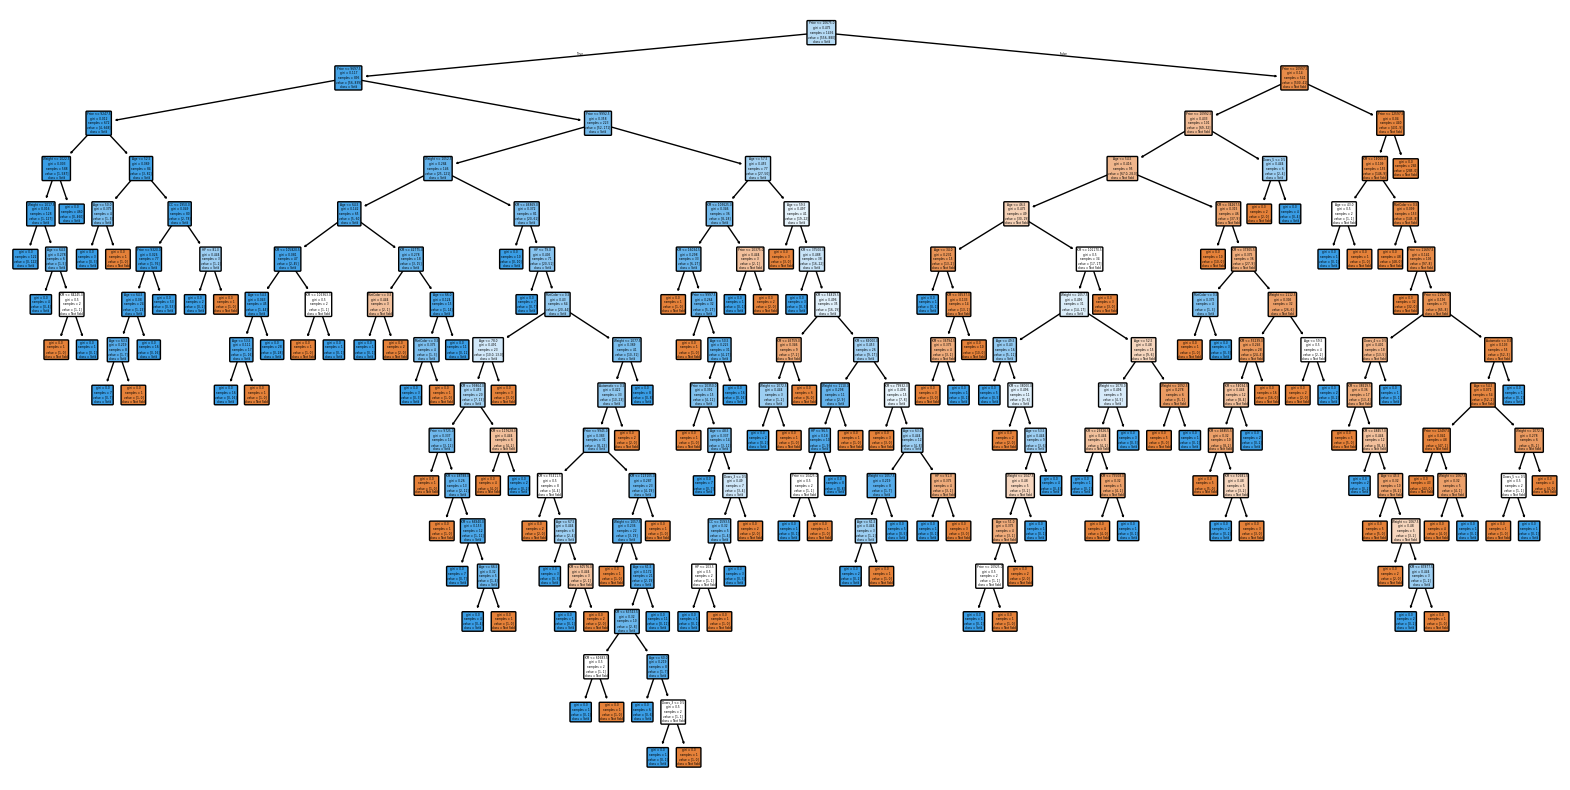

In [938]:
from sklearn.tree import plot_tree

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['Not Sold', 'Sold'], rounded=True)

# Show the plot
plt.show()

4. (2 pts) Retrain the Decision Tree Classifier with a maximum depth of 8 and evaluate it on the test set. Compare and explain the results.

In [947]:
# Retrain the Decision Tree Classifier with a maximum depth of 8
dt_classifier_depth_8 = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_classifier_depth_8.fit(X_train, y_train)

# Predict the labels on the test dataset
y_pred_dt_depth_8 = dt_classifier_depth_8.predict(X_test)

# Evaluate the model on the test set
accuracy_depth_8 = accuracy_score(y_test, y_pred_dt_depth_8)
precision_depth_8 = precision(y_test, y_pred_dt_depth_8)
recall_depth_8 = recall(y_test, y_pred_dt_depth_8)
f1_score_depth_8 = f1_score(y_test, y_pred_dt_depth_8)

# Print the evaluation metrics
print(f"Accuracy (max_depth=8): {accuracy_depth_8}")
print(f"Precision (max_depth=8): {precision_depth_8}")
print(f"Recall (max_depth=8): {recall_depth_8}")
print(f"F1 Score (max_depth=8): {f1_score_depth_8}")

# Compare with the previous results
print(f"Accuracy (original): {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision (original): {precision_score(y_test, y_pred_dt)}")
print(f"Recall (original): {recall_score(y_test, y_pred_dt)}")
print(f"F1 Score (original): {f1_score(y_test, y_pred_dt)}")


#Basically we don't need to get this deep on the tree, we can just use the max_depth=8 as it is the best option ratio between accuracy and depth
# We can explain this by the fact that the tree is overfitting the data, and the depth of 8 is the best option to avoid this overfitting

Accuracy (max_depth=8): 0.9166666666666666
Precision (max_depth=8): 0.9120879120879121
Recall (max_depth=8): 0.9540229885057471
F1 Score (max_depth=8): 0.9325842696629213
Accuracy (original): 1.0
Precision (original): 1.0
Recall (original): 1.0
F1 Score (original): 1.0


5. (6 pts) Train a Decision Tree Classifier for each depth from 1 to D where D is the maximum depth of the Decision Tree Classifier seen in the previous step. Evaluate each model on the test set and plot the accuracy of the models as a function of the depth and find the optimal depth.


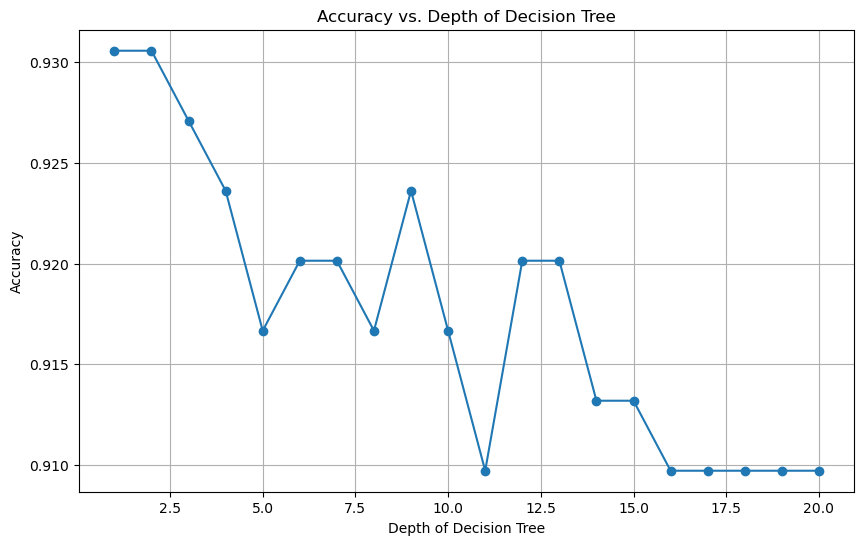

The optimal depth is: 1


In [940]:
import matplotlib.pyplot as plt

# Initialize lists to store the depth and corresponding accuracy
depths = list(range(1, 21))
accuracies = []

# Train and evaluate the Decision Tree Classifier for each depth
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    score_accuracy = accuracy(y_test, y_pred)
    accuracies.append(score_accuracy)

# Plot the accuracy as a function of the depth
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs. Depth of Decision Tree')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the optimal depth
optimal_depth = depths[accuracies.index(max(accuracies))]
print(f"The optimal depth is: {optimal_depth}")

6. (4 pts) Train a decision tree of depth = 1 , visualize the tree and explain what is the decision rule at the root node.

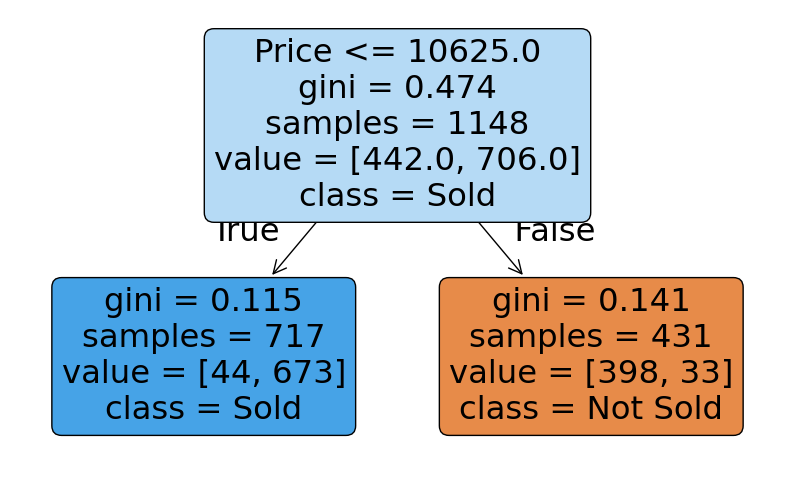

The decision rule at the root node is: Price <= 10625.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt

# Train a decision tree classifier with depth = 1
dt_classifier_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_classifier_depth_1.fit(X_train, y_train)

dt_classifier_depth_1.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(dt_classifier_depth_1, filled=True, feature_names=X.columns, class_names=['Not Sold', 'Sold'], rounded=True)
plt.show()

# Print the decision rule at the root node
feature = X.columns[dt_classifier_depth_1.tree_.feature[0]]
threshold = dt_classifier_depth_1.tree_.threshold[0]
print(f"The decision rule at the root node is: {feature} <= {threshold}")

## Part 4 Propensity Score Matching (10 pts)

Your mentor is thrilled with the progress, and he has asked Ivan to put the model into production. Based on the model's prediction, the sales manager Ivan will decide whether to lower the car's price by 5%.

A new quarter has passed, and Ivan has collected updated sales data, which includes the following columns:

- `Price`: The initial price of the car.
- `Pred_Prob`: The predicted probability of the car being sold within the first three months.
- `Applied_Discount`: Whether the discount was applied (Yes=1, No=0).
- `Discounted_Price`: The car's final price, calculated as `Price * 95%` if the discount was applied; otherwise, it's equal to `Price`.
- `Sold_within_3_months`: Whether the car was sold within the first three months (Yes=1, No=0).

Your task is to estimate the causal effect of the discount on sales within the first three months using propensity score matching.

In [950]:
data_df = pd.read_csv('data/Task4.ToyotaCorolla_discount_sales.csv', index_col=0)
print(data_df.head())

   Price  Pred_Prob  Applied_Discount  Discounted_Price  Sold_within_3_months
0  12750       0.01                 1           11475.0                     1
1  21950       0.00                 1           19755.0                     1
2   9950       0.79                 0            9950.0                     1
3   9930       0.91                 1            8937.0                     0
4   9450       0.97                 0            9450.0                     0


**4.1 (1 pts): How many samples are in the treated group, and how many are in the control group?**

In [951]:
nb_treated_group = data_df[data_df["Applied_Discount"] == 1].shape[0]
nb_control_group = data_df[data_df["Applied_Discount"] == 0].shape[0]

print(f"Number of customers in the treated group: {nb_treated_group}")
print(f"Number of customers in the control group: {nb_control_group}")

Number of customers in the treated group: 82
Number of customers in the control group: 118



**4.2 (5 pts): Propensity Score Matching**
- The propensity score is the predicted probability of the car being sold within the first three months from the logistic regression model, i.e. `Pred_Prob` column in the `Task4.ToyotaCorolla_discount_sales.csv` file. Create pairs of matched samples as follows:
  - For each treated sample (discount applied), find a control sample (discount not applied) with a difference in propensity score of less than 0.05.
  - If there is more than one control sample for a treated sample, choose the control sample with the smallest difference in propensity score.
  - If there is no control sample satisfying the condition, discard the treated sample.
  - How many successful matches did you get?

Notice that your output should be 1-to-1 matching, meaning that each treated sample should be matched with at most one control sample.
So each sample can only appear once in the pairs.

In [952]:
# Create pairs of matched samples
treated_samples = data_df[data_df['Applied_Discount'] == 1]
control_samples = data_df[data_df['Applied_Discount'] == 0]

matched_pairs = []

# Iterate over each treated sample
for _, treated in treated_samples.iterrows():
    # Calculate the difference in propensity score with each control sample
    control_samples['score_diff'] = abs(control_samples['Pred_Prob'] - treated['Pred_Prob'])
    
    # Filter control samples with a difference in propensity score of less than 0.05
    potential_matches = control_samples[control_samples['score_diff'] < 0.05]
    
    if not potential_matches.empty:
        # Choose the control sample with the smallest difference in propensity score
        best_match = potential_matches.loc[potential_matches['score_diff'].idxmin()]
        
        # Add the matched pair to the list
        matched_pairs.append((treated, best_match))
        
        # Remove the matched control sample from the pool
        control_samples = control_samples.drop(best_match.name)

# Ensure 1-to-1 matching
treated_ids = [treated.name for treated, _ in matched_pairs]
control_ids = [control.name for _, control in matched_pairs]
assert len(treated_ids) == len(set(treated_ids)), "Treated samples are not unique"
assert len(control_ids) == len(set(control_ids)), "Control samples are not unique"
# Number of successful matches
num_matches = len(matched_pairs)
print(f"Number of successful matches: {num_matches}")

Number of successful matches: 49


C:\Users\thier\AppData\Local\Temp\ipykernel_12692\3203745453.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_samples['score_diff'] = abs(control_samples['Pred_Prob'] - treated['Pred_Prob'])


**4.3 (4 pts): Average Treatment Effect (ATE)**

Now let's estimate the effect of the discount on sales. 

For each matched pair, there is one treated sample and one control sample. They may have different outcomes and we can calculate the average treatment effect (ATE) as 

$$ ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\\control}^{(i)} $$ 

where $y_{treat}^{(i)}$ and $y_{\\control}^{(i)}$ are the outcomes for the treated and control samples, respectively.

Notice that here the outcome is a simple binary variable, which is whether the car was sold within the first three months or not.

1. (3 pts) Calculate the ATE based on the matched pairs and report the result



In [953]:
# Calculate the ATE based on the matched pairs
treated_outcomes = [treated['Sold_within_3_months'] for treated, _ in matched_pairs]
control_outcomes = [control['Sold_within_3_months'] for _, control in matched_pairs]

ate = np.mean(np.array(treated_outcomes) - np.array(control_outcomes))
print(f"Average Treatment Effect (ATE): {ate}")

Average Treatment Effect (ATE): 0.3877551020408163


2. (1 pts) What is your conclusion about the effect of the discount on sales within the first three months?

Here, the positive ATE leads us to understand that the discount on sales within the first three months had an effect.